UJIAN AKHIR SEMESTER (UAS)

"DIAGNOSA HEART DISEASE MENGGUNAKAN METODE ANN "

Mata Kuliah Kecerdasan Buatan

Nama :Haqiqi Oktaviani

Nim  :09011181823127

Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T.


DAFTAR MODUL YANG DIGUNAKAN :

Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

Pandas = Modul ini akan digunakan untuk Load Dataset.

Matplotlib = Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix dan grafik akurasi.

Seaborn = Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.

Sklearn = Modul ini digunakan untuk mengolah data Machine Learning seperti preprocessing.

Keras = Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network.


In [73]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.activations import relu
import pandas as pd 
import numpy as np 
import sklearn
import keras 
import seaborn as sns

Code di bawah ini digunakan untuk load dataset dengan nama "heart.csv"    


In [5]:
dataset = pd.read_csv("D:/SEMESTER 5/Praktikum AI/heart.csv")

head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

Berikut adalah spesifikasi dataset yang digunakan :

    Input terdiri dari 13 variabel dengan berbagai indikator yang sesuai dengan permasalahan yang akan di bahas.

    Output terdiri dari 1 variabel, dengan 2 kondisi, yaitu 1 dan 0.


In [75]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


describe() berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata, median, dan lain sebagainya pada kolom.

In [76]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Pada ANN ini terdapat 2 output : 

no_fraud = kondisi saat ANN menetapkan bahwa tidak di diagnosa heart disease, nilai yang di ambil adalah pada Variabel "target" dengan nilai 0 yang ada pada dataset.

fraud = kondisi saat ANN menetapkan bahwa di diagnosa heart disease, nilai yang di ambil adalah pada Variabel "target" dengan nilai 1 yang ada pada dataset.

In [78]:
no_fraud = dataset[dataset.target==0]
fraud = dataset[dataset.target==1]

Pada code di atas, fraud di tambah datanya. Resample ini digunakan karena data yang unbalanced, maksudnya output 0 dan Output 1 jumlahnya terlalu ekstrim sehingga datanya menjadi tidak seimbang seperti yang terlihat pada grafik di atas.

In [79]:
from sklearn.utils import resample
fraud_upsample = resample(fraud, replace=True,n_samples=160,random_state=123)
dataset_resampled = pd.concat([no_fraud, fraud_upsample])

sns.countplot() berfungsi untuk menampilkan grafik dangan perhitungan berdasarkan target.

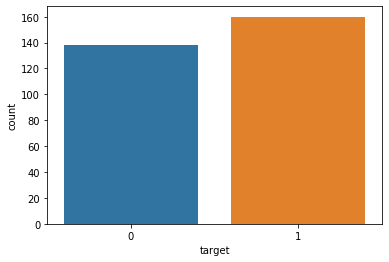

In [80]:
sns.countplot(x=dataset_resampled['target'],data=dataset)

HISTOGRAM

Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

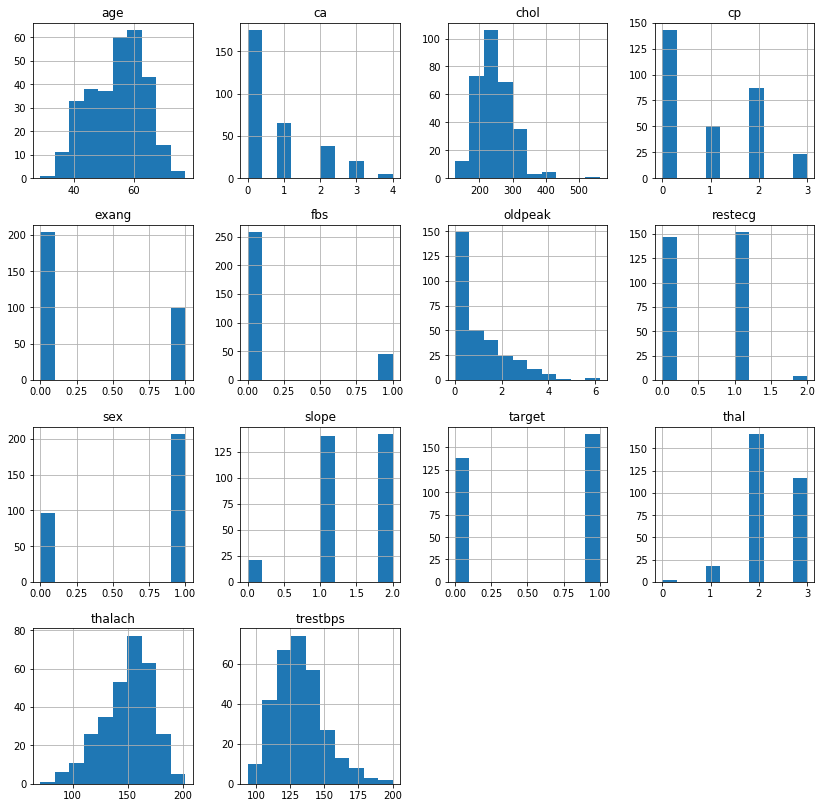

In [81]:
dataset.hist(figsize=(14,14)) 
plt.show() 

BOXPLOT

Boxplot berfungsi sebagai penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral dan ukuran penyebaran data pengamatan. 

age            AxesSubplot(0.125,0.834518;0.352273x0.0454819)
sex         AxesSubplot(0.547727,0.834518;0.352273x0.0454819)
cp              AxesSubplot(0.125,0.77994;0.352273x0.0454819)
trestbps     AxesSubplot(0.547727,0.77994;0.352273x0.0454819)
chol           AxesSubplot(0.125,0.725361;0.352273x0.0454819)
fbs         AxesSubplot(0.547727,0.725361;0.352273x0.0454819)
restecg        AxesSubplot(0.125,0.670783;0.352273x0.0454819)
thalach     AxesSubplot(0.547727,0.670783;0.352273x0.0454819)
exang          AxesSubplot(0.125,0.616205;0.352273x0.0454819)
oldpeak     AxesSubplot(0.547727,0.616205;0.352273x0.0454819)
slope          AxesSubplot(0.125,0.561627;0.352273x0.0454819)
ca          AxesSubplot(0.547727,0.561627;0.352273x0.0454819)
thal           AxesSubplot(0.125,0.507048;0.352273x0.0454819)
target      AxesSubplot(0.547727,0.507048;0.352273x0.0454819)
dtype: object

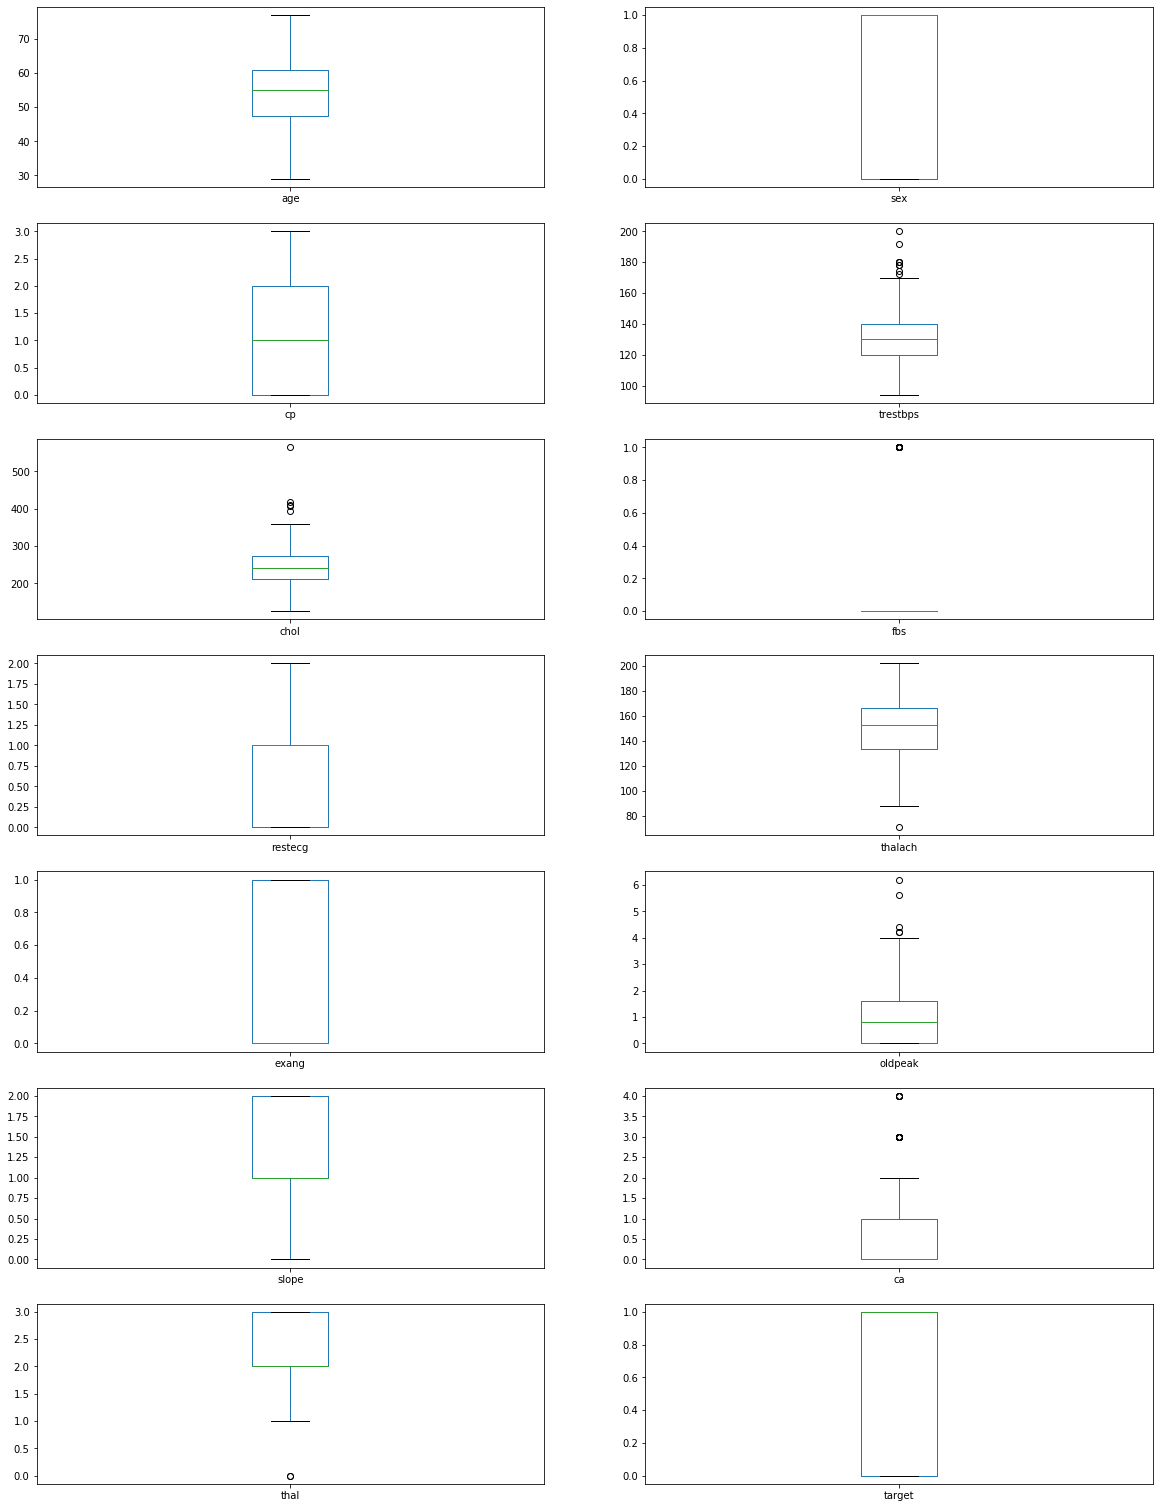

In [82]:
dataset.plot(kind='box', subplots=True, layout=(14,2), sharex=False, sharey=False, figsize=(20,55))

Nilai variabel x diambil dari kolom 0-13 (Input) dan Nilai variabel y diambil dari kolom 14 (Ouput).

In [83]:
x = dataset.iloc[:,0:13].values 
y = dataset.iloc[:,13].values 

In [84]:
data = pd.DataFrame(x)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


FEATURE NORMALIZATION

Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

Melakukan scaling dataset dan Mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.

In [85]:
from keras.utils.np_utils import to_categorical
scaler = MinMaxScaler() 

Merubah atau melakukan scaling pada nilai variabel x.

In [86]:
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(303, 13)

Mengkonversi class bilangan bulat menjadi bilangan biner.

In [87]:
y_categorical = to_categorical(y)
y_categorical.shape

(303, 2)

Membagi dataset dengan training 80% dari data dan testing 20% dari data dan setiap data pilih secara acak.

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_categorical, 
                                                   train_size=0.8,
                                                   test_size=0.20, 
                                                   random_state=8)

Mencetak ukuran data training dan testing, dimana x_train dan x_test untuk masukan, sedangkan y_train dan y_test untuk keluaran.

In [89]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (242, 13) (242, 2)
Testing data shape :  (61, 13) (61, 2)


Mencetak kelas keluaran yang dihasilkan (0 atau 1).

In [90]:
target = np.unique(y_train)
ntarget = len(target)
print('Total number of outputs : ', target)
print('Output target : ', ntarget)

Total number of outputs :  [0. 1.]
Output target :  2


SEQUENTIAL MODEL

Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [91]:
model = Sequential()

Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, x), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [92]:
model.add(Dense(14, input_dim=13, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Dense 14 = Model Neural Network yang saya buat pada layer pertama ini terdiri dari 14 neuron.

Rectified Linear Unit (ReLU) = Merupakan fungsi aktivasi linear yang digunakan pada layer ini.

Input dim 13 = Berdasarkan dataset yang digunakan, variabel terdiri dari 14 kategori. 13 kategori input, dan 1 kategori output.

Dense 5 = Model Neural Network yang saya buat pada layer pertama ini terdiri dari 5 neuron.

Rectified Linear Unit (ReLU) = Merupakan fungsi aktivasi linear yang digunakan pada layer ini.

Dense 2 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 2 neuron, neuron inilah yang akan menghasilkan output berdasarkan dataset.

Sigmoid = Merupakan fungsi aktivasi yang digunakan pada layer ini, fungsi aktivasi sigmoid memberikan output dengan rentan nilai antara 0 s/d 1.

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 14)                196       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 75        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 12        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


Params atau Parameter adalah total model yang akan dipakai pada program ini sesuai dengan Model yang dibuat sebelumnya.

compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

Adam = Adam adalah optimizer yang digunakan untuk memperbarui bobot jaringan berdasarkan data pelatihan

Binary Crossentropy = Binary Cross ini berfungsi untuk mengukur kinerja model klasifikasi yang outputnya adalah nilai probabilitas antara 0 dan 1.

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)

Batch Size 64 adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 64 bagian untuk memudahkan index pada saat pelatihan.

Validation SPlit 0.2 adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0.8 atau 80%, dan data testing sebesar 0.2 atau 20%.

In [95]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6895 - acc: 0.4628 - val_loss: 0.6736 - val_acc: 0.4918
Epoch 2/100
242/242 [==============================] - 0s 116us/step - loss: 0.6848 - acc: 0.4917 - val_loss: 0.6710 - val_acc: 0.5246
Epoch 3/100
242/242 [==============================] - 0s 153us/step - loss: 0.6806 - acc: 0.5145 - val_loss: 0.6685 - val_acc: 0.5164
Epoch 4/100
242/242 [==============================] - 0s 95us/step - loss: 0.6769 - acc: 0.5517 - val_loss: 0.6659 - val_acc: 0.5246
Epoch 5/100
242/242 [==============================] - 0s 83us/step - loss: 0.6738 - acc: 0.5579 - val_loss: 0.6638 - val_acc: 0.5246
Epoch 6/100
242/242 [==============================] - 0s 108us/step - loss: 0.6706 - acc: 0.5682 - val_loss: 0.6615 - val_acc: 0.5328
Epoch 7/100
242/242 [==============================] - 0s 83us/step - loss: 0.6673 - acc: 0.5785 - val_loss: 0.6595 - val_acc: 0.5410
Epoch 8/100
242

Untuk melatih model kita menggunakan model.fit dimana X_train adalah numpy array yang digunakan sebagai data training untuk inputan, y_test adalah numpy array yang digunakan untuk data target atau keluaran, batch_size jumlah sampel per pembaharuan gradien jika tidak kita set maka nilai nya akan menggunakan nilai default yaitu 64, epochs jumlah epochs untuk melatih model, epochs adalah iterasi atas seluruh data x dan y yang disediakan, 1 kali epochs sama dengan satu kali perhitungan maju mundur, validation_data(20%) untuk mengevaluasi kerugian dan metrik model apa pun pada setiap akhir epochs.  

BERIKUT INI ADALAH TAMPILAN PREDIKSI DATA, DAN MENCETAK PREDICT DARI INPUT YANG AKAN DIPEROLEH:

In [96]:
predict = model.predict(x_scaled)
predict

array([[0.26058966, 0.6660023 ],
       [0.46746328, 0.440583  ],
       [0.15388054, 0.9135109 ],
       [0.20858172, 0.8386818 ],
       [0.41285077, 0.6521953 ],
       [0.47984582, 0.5011509 ],
       [0.28382632, 0.7394016 ],
       [0.1869734 , 0.8503748 ],
       [0.08398095, 0.9290699 ],
       [0.14569336, 0.89283276],
       [0.41380864, 0.60699785],
       [0.05233708, 0.9657478 ],
       [0.19838995, 0.84677154],
       [0.36842006, 0.557297  ],
       [0.02763695, 0.980921  ],
       [0.10301864, 0.9244213 ],
       [0.04491827, 0.9708528 ],
       [0.20065668, 0.77151585],
       [0.39995998, 0.631405  ],
       [0.09992969, 0.91703284],
       [0.60755473, 0.32244825],
       [0.14537734, 0.8707337 ],
       [0.30650246, 0.76483107],
       [0.39677683, 0.5364922 ],
       [0.10430604, 0.8934603 ],
       [0.2512223 , 0.75893074],
       [0.10188296, 0.9153425 ],
       [0.12833267, 0.9068452 ],
       [0.08291838, 0.9324306 ],
       [0.36726886, 0.535742  ],
       [0.

In [97]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 295us/step

acc: 82.79%


In [98]:
print(scores[1])

0.8278688553903923


TRAINING AND TESTING ACCURACY

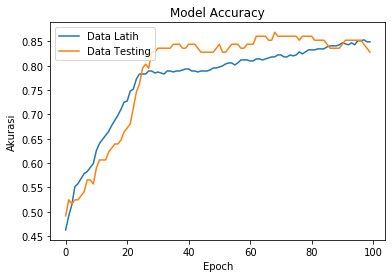

In [99]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

TRAINING AND TESTING LOSS

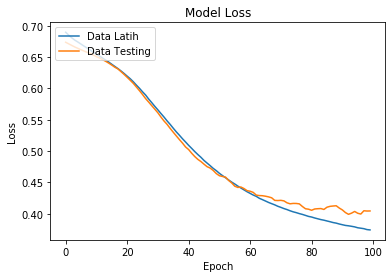

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

CONFUSION MATRIX

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [101]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_categorical.argmax(axis=1), predict.argmax(axis=1))

Konsep dari confusion matrix adalah sebagai berikut : 

In [102]:
ConfusionMatrix

array([[114,  24],
       [ 21, 144]], dtype=int64)

ACCURACY

Melalui confusion matrix, rumus dalam menghitung nilai akurasinya adalah sebagai berikut :

In [107]:
#Accuracy = ((TP+TN) / (TP+TN+FP+FN))
acc = ((114+144) / (114+144+24+21))
print("\n%s: %.2f%%" % ("Accuracy", acc*100))


Accuracy: 85.15%


PRECISSION

Melalui confusion matrix, rumus dalam menghitung nilai presisinya adalah sebagai berikut :

In [108]:
#Precession = ((TP) / (TP+FP))
prec = ((114) / (114+24))
print("\n%s: %.2f%%" % ("Precission", prec*100))


Precission: 82.61%


RECALL

Melalui confusion matrix, rumus dalam menghitung nilai recallnya adalah sebagai berikut :

In [109]:
#Recall = ((TP) / (TP+FN))
recall = ((114) / (114+21))
print("\n%s: %.2f%%" % ("recall", recall*100))


recall: 84.44%


TRUE NEGATIF RATE

Melalui confusion matrix, rumus dalam menghitung nilai TNRnya adalah sebagai berikut :

In [110]:
#TNR = ((FP) / (TN+FP))
TrueNegatifRate = ((24) / (144+24))
print("\n%s: %.2f%%" % ("TrueNegatifRate",TrueNegatifRate))


TrueNegatifRate: 0.14%


F1-SCORE

Melalui confusion matrix, rumus dalam menghitung nilai F1-Scorenya yaitu sebagai berikut :

In [113]:
#F1-Score = ((2*Precession*Recall) / (Precession+Recall))
F1 = ((2 * prec * recall) / (prec + recall))
print("\n%s: %.2f%%" % ("F1",F1))


F1: 0.84%
